### CS6493 Natural Language Processing Assignment 1
Student Name: CHEN Shiwei \
ID: 56708605 \
Contact: shiwechen6-c@my.cityu.edu.hk

In [1]:
from IPython import display
from base64 import b64decode

#### Question 1
(**11 marks**) We could represent the word with one-hot encoding in a language model instead of ascii representations.That is, we represent the word $w$ with:
$$\lVert V \rVert = \operatorname{length}\big([0,0,\dots,1,\dots,0,0]\big)$$
where $V$ is our vocabulary and $\lVert V \rVert$ is the size of it.

**Q1a.** Suppose we have a vocabulary {buy, bought, girl, woman, word, words}, please represent each word using the one-hot encoding. (**3 marks**)


**My answer**:
Given a a vocabulary size, the one-hot vectors should be the of length 6. Assign the encoding sequentially, we have: $$\begin{align*}\text{bug} &= [1,0,0,0,0,0] \\ \text{bought} &= [0,1,0,0,0,0] \\ \text{girl} &= [0,0,1,0,0,0] \\ \text{woman} &= [0,0,0,1,0,0] \\ \text{word} &= [0,0,0,0,1,0] \\ \text{words} &= [0,0,0,0,0,1] \end{align*}$$


**Q1b.** Combined with the previous question, what are the drawbacks of doing so? Answer at least two reasons. (**4 marks**)

**My answer**: There are a couple issues with one-hot encodings:
- The size of the encoding grows linearly with the size of the corpus. Sparsity means expensive computation.    
- Each vector representation is equivalent in one-hot encoding, in other words, no contextual/semantic information provided.

**Q1c.** Given a vocabulary {girl, woman, boy, man}, consider a computation unit with 4 nodes, when we use the one-hot approach to encode the word “girl”:

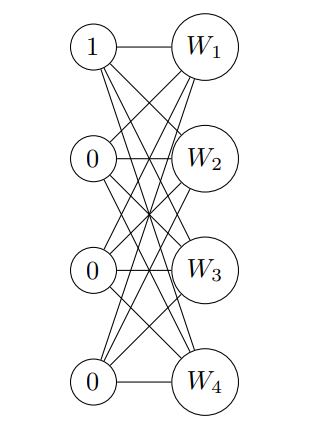

In [2]:
base64_data = "iVBORw0KGgoAAAANSUhEUgAAAUQAAAG4CAYAAAA9up6kAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAAHYcAAB2HAY/l8WUAAGE0SURBVHhe7Z0JnI3V/8dnzGL52ZOS0GIZOxGKLCEk2fctxppQSaSSNqLslBYSsmXLlh/KlkRSlixlLXuUnyWmmfl///dzPKeu6z73Pst57tz7zPf9es2L89xrZtyZ+3k+n3O+53uiiGEYhhGwIDIMw2iwIDIMw2iwIDIMw2iwIDIMw2iwIDIMw2iwIDIMw2iwIDIMw2iwIDIMw2iwIDIMw2iwIDIMw2iwIDIMw2iwIDIMw2iwIDKMHy5fvkwbN26kMWPGUMeOHenRRx+lWrVqUZUqVahSpUpUvXp1qlevHjVv3pyGDh1KS5cupVOnTmn/molUWBAZxsPx48dp8uTJ9MQTT1DJkiUpLi5O/Nm5c2eaMGECzZs3T4jemjVr6Msvv6QVK1bQggULaNq0adS/f3+qWrUqZcmShfLnz09NmjShN954g7Zu3ap9diZSYEFk0jXr16+nFi1aUNasWally5Y0evRo4QzhEM2SkpJCu3btoqlTp1Lv3r0pX758VLFiRZo+fTpdu3ZNexYTzrAgMumOK1eu0Pvvv0+lS5emggUL0ogRI+j333/XHlXH33//TXPnzqVq1apRnjx5aPDgwXTs2DHtUSYcYUFk0g3/93//J+Jvrly5qHbt2rR48WLh6kLBDz/8QImJiZQtWzYRy//880/tESacYEFk0gVHjhyhmjVrUtmyZen777/Xroaec+fOUadOncRc4xdffKFdZcIFFkTG9SAewxW+/PLLIsaGA59//jndfvvt1K1bN7p48aJ2lUlrWBAZ14KVY5TGlChRgr777jvtavgAt9i6dWsqVKgQffXVV9pVJi1hQWRcyaFDh8SCyYABA8J+hXf+/Pl0yy23iNIeJm1hQWRchxTDkSNHalfCn2+//ZZFMQxgQQwBWFFEQe8HH3xA48ePp1GjRtG4cePE3Nbq1avpjz/+0J7J2CUSxVDCopj2sCA6AAQQux7atm1LhQsXpvj4eCpfvjy1adOGunbtSr169RJ/4vH77rtPPH7vvfeKxydOnMgCaZFIFkMJi2LawoKoEOxS6N69u6g1a9SoEU2aNEls3wo2h4XHt23bJkS0cePG4t9j9XHnzp3aM5hgnD59OuLFUCJFcfny5doVJlSwICpg79699PDDD4tf4ueff17UvNnh6NGjNGjQILG7oUaNGrRnzx7tEUYP3Ej69OmjjSKf//73v3Tbbbc5soOG0YcF0QapqaliPjBHjhzCmfz111/aI2q4evUqvfPOO5QzZ0566623QrarItKYMWOGmJrAljw30bNnT7G/mgkdLIgW+eWXX+jBBx+k+++/XzhEJ9m/fz9VrlxZtJ76+eeftasMOHHihHDmX3/9tXbFPVy6dInuvvtunk8MISyIFsBcYd68eem1116j5ORk7aqzwB2++eabdOutt9KPP/6oXWUaNGggag3dyrp168TPHHOkjPOwIJpEiuGHH36oXQkt6L/HongdtNkqXry4mFpwM/369RNzpIzzsCCaIK3FUMKiSMKZo0EC+hm6HcyNorciN5x1HhZEg1y4cIHuvPNOUUwdDsAd3XHHHem2ZhHb3VDDmV545ZVXxFEGjLOwIBoEreTD7RcSffXat2+vjdIXONMEN4X0wsmTJ0VX77Nnz2pXGCdgQTQAztJAPAu3pp7StS5atEi7kj5AwTpWlt0+d+gLdjLhrBbGOVgQg4BIivmbcG3mKQt40UoqvYDdQCiAT2+gtAg3QK5HdQ4WxCDgjhzuxbFwDsOGDdNG7gYuHVsbsZvHLHsnt6QKJROoWEJJKl22LJUuWZyKFS1KCeVb0uS9msikHKKpHStQyYRilFCiNJUtW4ZKlUigosWKU7mGI2lb0vWngdTTcymx7L1UuGgClShVhsqU8ny+hCo0YOUl7RnqwZ54nPbHOAMLYgCwkok7ssqi3+TjG2ju6oOk8h6Pva9wseHSDdpJsJiCowAsk3qW5ra5jTJERVFssR605MhlStUeuoELyymxYAxFRcXQnW1m0MHLfp9FdPUUbXqlGmXLXISav7OGDus9TxHynGjGGVgQA/DZZ5+JO7IKUi8epC8/eJpq3RFHGRtOpQvadVVgx8ycOXO0kXtBVLYXl5Np59DyFOcRxPjqo+mInn6l7KfhVeI8ghhHFV7d7flXeqTS0cnNqdHoPeRlHh0DN2fUXjLOwIIYADRW+Oijj7SRFa7SyuerU4Vy5alynZbUq10lypkhSgii6uUZnP2Lw9LdDppo4EZlnVT6dXwtivcIYlzpF+k7PaVLPUJjqsd7BDGWCvffoC92f6ygvi1fpx2hUEMPqElEuzhs62PUw4KoAxYpMmbMaLthQ9KlC3RFy8fXViTSHQ4JIlqIZc6c2dVbvHCMKBpp2O0mdHlmU8oSHUUxBXrSap3ObJc3PEflssZRdFQGuqXjYs+tzR/XaOvQlvTs2tAeEoXzpNNDQXpawIKow6pVq0QMVYmTgggeeOABV/fQO3DggGiJZperyxMpn+fnEJ2tJc311yAneTeNatebhnQqRDFR0bo/r5QDE6l9t9l00tlpw5vo0qWL6ILEqIcFUQesLvfu3VsbqcFpQezbt6+rV5s//fRTql+/vjayTtI3AykhNoqi4uvQ5FO+auaJ1NMTKXHaYdoxtJyYa4yrOooO+q6CpZ6meT3a0fj9oS+Beffdd8VpfYx6WBB1aNKkifKdEE4L4ieffEKPPfaYNnIfWEwZMmSINrJOyv4RVCXOI4hxFem1PT6C9ucKerr9SNqV7BHGcTXFXGNsycG01WeO8NK6gdRq6Lc6UdpZsKe5WLFi2ohRCQuiDjgrV3XzBKcF8aeffhL7m91Kjx49aPTo0drIBuc+oPoZPYIYW5j6b/RWumu0dVhbemHDZTG6NLPJ9bnG/N3pC++5xuRdNKJNP1qeRtvI0YsTh9wz6mFB1AHFv2g+qhKnBfHMmTNiYcWtoP4OcdE2Vz6jtjmjKSpDHuq4+F+Pl/LLJOrcZyGd0VL01eVd6XbMNWZtRp9e10gPqXR0ahfq+vEx//WLvlw+Taf+VBurf/vtN7G4xKiHBVGHuLg45Z1knBbEixcvUnR0NI0YMUI0k3XbR7169ejjjz/W/rc2uPYlPXlXDEVFZ6SGU7WfROppmt+7C0059K94JW1+joqJucaHaeIJTf7OL6W+bUfR7oB9gVPoypl9tH7mK9SieC6qGLCO0TyyAoJRDwuiDrGxscqbOTgtiKhNgyD2799fLLC47aNOnTqi3tI2yT/Q0HLXi66rjrq+a+jSusHU4Y0dntD8Lyn7hlNlMddYgYbtgqRdpS1DW9NgLVL75xqtH96G2nZ/gcZ9MpCqxcdR+aE/KhXE8+fPi1pERj0siDqg1RJaLqnEaUFEa6hMmTJpI/fRoUMHeu+997SRDVKP0dia14uuSwzaSknJu2hkx4G0xnf70Nn3qR7mGmPuob7rkyhl/3jq8ORCOmu0zObix9Qoo3pBPH78OGXPnl0bMSphQdQB7b5UH//ptCCiTg+db9wKutxgL699LtGMJpkpOiqG8ndbTr9M6069Zp+8eU7wynxqI+Yac1P7BUdodo/ON0TqoDgkiAcPHnT1zzktYUHUoWHDhuJ4S5U4LYizZ88W82xuBYdJvfzyy9rIDldpWRc0eIimLHUTqXeXCeS3nPDaWupdCA0e4qlmYk9q6xOpg+KQIG7fvl0cu8qohwVRB7Rsx+E+KnFaEJ999ll68cUXtZH7wPxho0aNtJEdkmjzgKIUGxVF0ZnK04tbdKoJk3fQy2Ux1xhNcUWfujlSB8MhQcSZPs2aNdNGjEpYEHVYtmyZOHdZJVc9gogtYxkf/cgRQURb/cWLF2sj94E6S7Q5s08K7XuzEsV5IvNdictIt5Yg9SiNqRHvicy3U8tZfiJ1MBwSRNRjopKAUQ8Log5okoCaPnU9BlPpxPuPUrboKIq7/1Xarbg7Cno3YiEIE+5uJTU1Vdn/8eyURyhTnsY09VggmbtInzTOQtlrjvEfqYPhkCDicK01a9ZoI0YlLIgBqFSpks0eg8n04+imVOn++6lCmSKU/5ZclCsXPnJTvntKUwXP9ftrvkBrTU1M+Udl78Zw5qGHHlLigpN3zaLRi4I16k2hAwvG0dyfLP6AHBBEdDVCyU24ne/jFlgQA4C9wapjs1Okl1PonnnmmciZJ3VAELGPmRdUnIMFMQC4G+Ng+h07dmhXwhMcoJ9eTqHDSvojjzyijcKcPz6iRz2CWObF7coEcdKkSdS2bVttxKiGBTEI6K6C/nPhTLdu3dLNKXTYr415xFOnTmlXwo1k2jO1D7Vu1ZIaP1SMbsuVi3IXqkANmrWklu1G0kab0yNILKrLwZh/YUEMAt54cF8qD5pSyZYtWyh37tyuXkzxBYfzp5dTBr1BUkFiQXJhnIEF0QC4IxcpUkScZxFO4HiDokWL0rRp07Qr6QPcBNLLKYPedO3aVUk/SEYfFkSDNG7cWHmhtl2wwIAdNemRihUr0ty5c7WR+0FDB7SkQ+svxjlYEA2CusRbb72VFi1apF1JWz7//HNxvojqBhSRAtqApYdTBiUjR47k3SkhgAXRBJhHxHxdWu8GWbp0qahnTM8nr2FFHTcE7Ot1O5gauOuuu2jdunXaFcYpWBBNsmnTJiFGaSWKEMOcOXOKA7CwOyU9g+MEEJ3d/joMHTqUatasqY0YJ2FBtIAUxffff1+7EhpQeI2v+9///pdq1aolIlR6FkVs5UNsfv3117Ur7gMOGD/zw4cPa1cYJ2FBtAh+URMSEqhBgwaOl7xgnhCLJ8WKFaNt27aJa1jxZlG8fuASHLPqA8HCAZTXlCxZkqZMmaJdYZyGBdEGmMdCjz7UKWKb3//93/9pj6gBn2/WrFlirgwryiiz8YZF8ToTJkygsmXLuq4MZ9CgQZGzK8clsCAqAIstuJPfe++9Yl7L7sb7Cxcu0NixY8WeVbjCjRs3ao/cDIvi9RsHXoOXXnpJuxL5yIJ7LrMJLSyICkFLpscff1zUi6HdPTrQHD16VHs0MMeOHaMFCxZQz549xXkZaIT6zjvvULly5YI6TxZFoiNHjoiyKCWn8qUx+/btE4XnSAdMaGFBdAC8OdHqHiKF83PxRq1fvz49/fTT9MILL4htZ/gTY8xBYjsWRBDPb9OmzT9t8rFoAIdopPaRRZHEPGKki6IUw8mTJ2tXmFDCgugwcHc4/Al3e6yGYusV5h0hiK+99hrNnDmT9u/f/48L3Lx5s6g5k+DfGXGJgEWRaOXKlWLONRJFkcUw7WFBDDMgfHfeeec/q8lmXCJIz6KIFWe8dpjHjTSnyGIYHrAghiE4aH7gwIHayJxLBOlRFL3FEMj4/Pbbb4ubSjiDHUcshuEBC2IY4hubzbpEkJ5E0VcMJXBdFSpUEMcO4CzjcANlVGgYgog/f/587SqTlrAghiG+sRmYdYkgPYiinhhK8P/GXC2Kt9Ft2szr5yTffPONaCmHaoLwbXab/mBBDFN8Y7MVlwjcLIrBxNCbH374gcqUKUO1a9c2XArlBCjmx88VNYY4Z5oJL1gQwxTf2AysuETgRlE0I4aSpKQkcUAVjiBo166dcGmhAgXWqDBAiRVKrbjgOjxhQQxT/MVmqy4RuEkUrYihN4mJieIcmvz584s5RnQcd+qALrTsat68uRBhnM3z/fffa48w4QgLYhjjG5uBVZcIpCjiDRqpomhXDH/66Scxn/jHH3+I12DevHli0QULG0899ZR4fVE3anWuEYdgLV++XBTflypVigoVKkRvvfUWnTt3TnsGE86wIIYx/mKzHZcIIlkU7YohaN269U17nnHWMdqIYYcQ4izEETuMHn74YXGaIVaAURqD5+HIV4gquh2hDdyKFSto+PDhwnkXKFCAMmfOTA888AD17dtX9K4M95If5kZYEMMYf7EZ2HGJIBJFUYUYertDb7BzCN2EvMHCC/aio+NM3bp1RbQuUaIE3X333VSwYEFxU8LPoFq1amL/+YcffihqHyN9OiK9w4IY5viLzXZdIogkUVQhhsCfOwSIteguwzAsiGGOv9gM7LpEAFFEa/pwFkVVYqjnDr/99lsRde28jox7YEEMc/RiswqXCMJZFFWJIdBzh/7iMpN+YUGMAPzFZqDCJYJwFEWVYqjnDgHHZcYbFsQIQC82S5eo4gTAcBJFlWII9Nwhx2XGFxbECEAvNgNVLhGEgyiqFsNA7pDjMuMLC2KEoBebVbpEkJaiqFoMgZ47BByXGV9YECMEvdgMVLpEkBai6IQYBnKHHJcZf7AgRggyNn/33XfalX9R7RJBKEXRCTEEgdwhx2XGHyyIEYRebAY4m0WlSwShEEUphjhhUCWB3CHguMz4gwUxgsD5z3qxOSUlRblLBE6KolNiCAK5Q47LjB4siBFEoNgMnHCJQIpiixYtlImik2IYzB1yXGb0YEGMMALFZqdcIlApik6KIQjkDgHHZUYPFsQII1BsBk65RKBCFJ0Ww2DukOMyEwgWxAgjWGx20iUCO6LotBgCuEMcE6AHx2UmECyIEUig2AycdInAiiiGQgylOzx//rx25WY4LjOBYEGMQILFZqddIjAjiqEQQxDMHaLjNcdlJhAsiBFIsNgMnHaJwIgohkoM9+7dG9QdclxmgsGCGKEEi82hcIkgkCiGSgxBmzZtArpDgLgcyqNHmciDBTFCCRabQShcIoAo1qhR4wZRDKUYGnGHHJcZI7AgRihGYnOoXCLwFsV9+/aFTAyBEXfIcZkxAgtiBBMsNoNQuUQAUaxUqZI4inPkyJHaVWcx4g4Bx2XGCCyIEYyR2BxKl4iYfMcdd9A999xjaPVZBUbcIcdlxigsiBGMkdgMQuESvecM/c0pOoFRd8hxmTEKC2KEYyQ2O+0S/S2ghEIUjbhDwHGZMQoLYoRjJDYDp1ziwYMHdRdQpCi2bNlSuSgadYcclxkzsCBGOHij58+fP2hsdsIlSjF8++23tSs345QoGnWHHJcZM7AgugDE5ueff14b6aPSJRoRQ4lqUTTqDgHHZcYMLIguALH57rvv1kb6qHKJZsRQolIUjbpDjsuMWVgQXYDR2AzsukQrYihRIYpm3CHHZcYsLIguwWhstuMS7YihxK4oGnWHgOMyYxYWRJdgNDYDKy5RhRhKrIqiGXfIcZmxAguiSzATm826RJViKLEiimbcIcdlxgosiC7CaGwGRl2iE2IoMSOKZtwh4LjMWIEF0UWYic1GXKKTYigxKopm3CHHZcYqLIguwkxsBoFcYijEUBJMFM26w+eee47jMmMJFkSXYSY267nEUIqhJJAomnGHgOMyYxUWRJdhJjYDX5eYFmIouXz58k2iaNYdclxm7MCC6DLMxmbpEpcsWZKmYijxFUWz7pDjMmMHFkQXYiY2A7jEEiVKpLkYSqQo1qtXj3LkyGHYHQKOy4wdWBBdiNnYfODAAYqNjaXOnTtrV9IeiOKtt95KxYsXD7j67A3HZcYuLIguxExsljEZ0bR8+fLa1bQHc4dwhw8++CC1atXKkChyXGbswoLoUozEZu85Q++5xHBAzh3K+GxEFDkuM3ZhQXQpwWIzxBDx0nvOEHOJ4eASfVeWjYiik3EZnxNlQefOnaPffvuNjh07RmfOnKGLFy+KGwnjHlgQXUqg2CzFcNSoUdqV64SLS/S3shxMFFXF5dTUVCHIM2bMoL59+9IDDzwgjlWNioqijBkzCqHOnTs3ZcmShaKjoylDhgxinrNjx440YcIE4VCvXr2qfTYm0mBBdDH9+vW7KTbriaEkrV1ioLrDQKJoJy7D6U2cOFF87mzZstFtt91GDRs2pGHDhtHy5cvp1KlTQij9cenSJeHGx40bR+3btxc3lPj4eCpbtqwQ6UOHDmnPZCIBFkQX4xubg4khSGuXGKzu0J8oWo3L+/btoz59+ojFmwYNGtD8+fPp119/1R61zv/+9z/66quvqHfv3pQ9e3Yhrl988YUjcZ5RCwuii/GOzUbEUJJWLtHorhRfUTQTl/GaQOzr1KkjvtbTTz8tjlF1Cojj+PHjqWjRolSkSBEaO3asuMaEJyyILgexuXv37obFEKSVSzSzK8VbFAsWLGgoLiO+Vq9enRISEmjKlCnic4QKCPGqVauEW7zjjjtoxYoV2iNMOMGC6HLmzZtHMTExhsVQEmqXaNQdegNBw/eIRY+///5bu+qf9957T3z+V155JehznWbp0qWUL18+6tq1K7vFMIMF0cUgJqPOEPNYRvc2S0LtEuEOhwwZoo2MAweMaQG91WfMCdatW5dKlSpF33//vXY17YHwt23bVrjbtWvXaleZtIYF0aV4zxn6W202QqhcohV3KMHq8pdfful39RmLJCiRGTx4MCUlJWlXw4sFCxZQ3rx5RYmP3ko2EzpYEF2I7wKK2b3NErhELAY47RKtukPv1WXfhZZZs2ZRnjx5aPPmzdqzw5ezZ8+KLYoo22FRTFtYEF2Gv9Vk79Vms6BA2UmXaMcd+q4uS1F86qmnhBiGU0QOBmohWRTTHhZEB4FT+eGHH+jDDz+kHj16iLmsatWq0f33309Vq1YVpR9YAf7ggw9ox44dfufAzBCotMZqbHbaJVp1h+Cuu+66aXV5+vTpESeGEhbFtIcFUTGYq0Jcg1PB6icmzZs1a0bDhw+nhQsXigJdzHnhz0WLFtGIESOoefPmYi4sU6ZMoiwErszsnFcgMQRWYzNwyiXacYeIy1gwgvuVyJgciWIoYVFMW1gQFXHixAl6+eWXxbavypUrCxFBAwAzYC4Jb2rsn8VEO2ryjh8/rj2qTzAxBHZis1Mu0Y47RFxGUbVkw4YNdMstt0S0GEogivgdGDRokHaFCRUsiDaBWLz11luitKVTp06WBMcf27dvpyeeeEJ8XrhLfB1/GBFDidXYDFS7RDvuEHjHZcwd3nPPPfTpp5+KsRvAjRAr5Fb3ZzPWYEG0ATpNV6lShSpVqiT2xToBvgbcAlyn79cwI4bATmxW7RLtuEPfuIw9w5iWcBuYD8Vr/tdff2lXGKdhQbQIFkrgcAK5N1VIF4qvhy1nwKwYAjuxGahyiXbdoXdcXrNmjZhewHSDG2nUqJFo9suEBhZEC6DvHfaj/vjjj9qV0LBr1y4haBBhs2IosRObVblE7NCw6g6BjMvY9obXAcXNbgWtx7BQtH79eu0K4yQsiCaRYrh//37tSmj5+eefhShadQ12YjOw6xIR++24Q++4jKgMcXU7c+bMET+zcN1t4yZYEE0wefLkNBVDiRRFtJUyi93YbNcl2nWHMi7//vvvlDVrVkOr8G4Ac8huWjQKV1gQDYLC6Vy5cjm2eGIWLLbg+7EibHZiM7DqEu26QyDjMqYNcJh9egH7yrG4xjgLC6IBEFXQLQUtpMIJ7HDBAfPXrl3Trhhj06ZNtmKzVZdo1x3KuIwdPSh4R+1hegG/g1g8ckOdZTjDgmiAF154QWy7C0fq169PAwcO1EbGkLEZtY5WMesSVbhDGZex46dMmTLa1fTDSy+9JGpTGedgQQzCzp07RYGsirM2nABzaFZ2aNiNzWZdol13CGRcrlWrlnDH6Q38rDFviuNQGWdgQQwC7si4M4cz6ALdoUMHbWQMu7EZGHWJKtyhjMv4XJg7xTnJpknZS5NbVqCSCcUooWRpKlu2NJUsXswj7AlUvuVk2quVk6YcmkodK5SkhGIJVKJ0WSpbphSVSChKxYqXo4Yjt9G/a72pdHpuIpW9tzAVTShBpTyutZTn8yVUGUArL2lPUQzmTd955x1txKiGBTEASlcyrxylb5bMoCkTJ9O0hZvpyGV1G/dPnjwpvk8ze6dVxGajLlGFO5Rx+f333xfNMOyQenYutbktA0VFxVKxHkt0fxYXlidSwZgoioq5k9rMOEh6P7KrpzbRK9WyUeYizemdNYd1n6eCTz75hB577DFtxKiGBTEA6ETTokULbWSVa3RgTm+qUrIG9R6/mDZt2UCLJ/ShmiUrU88Ze0jVMUfYCvf6669rI2PYjc0gmEtU4Q6BjMtol4ZdO7ZI3klDy8d5BDGeqo8+4vF5/knZP5yqxHkEMa4Cvbo7QGu21KM0uXkjGr3H+TpB7PK5/fbbtRGjGhbEAKAll70dAql0ZnEXujv7fTRo45/atetc2jqMquQsSO3nn9R9Q5oBBddwfHB+RlERm4O5RBXu0LsYG+Jr+wyS1F9pfK14jyDGUekXvyM9qUs9Moaqx3sEMbYw9d+gL3Z/rOhLLV/f4RWlnQMtwXCY/m+//aZdYVTCgqgDzurFYoUtLq2lp4rEUa7ms+jmafALtKjjbRSXvxMtsmee/gGtx+DIjKIiNgM9l6jKHcq4fPXqVYqPj6c//7zx5mKeyzSzaRaKjoqhAj1Xezy8Py7ThufKUda4aIrKcAt1XHxVu+7Dta00tOWztPaiNg4B6Jm5ePFibcSohAVRB2yXeuSRR7SRNc7PaUW3ZPDEsjFH/bjAVDo1uQ7FR2enhh+qcYmPPvqoKOA1g4rYLF3i559/rl25jgp3CGRc/vbbb8Vh7/a5SssT81GGqGjK1nIu+VueSd49itr1HkKdCsVQVHRGajjVnwin0IGJ7anbbDU/P6MMGDBAyevK3AwLog4qfuk+75yXMkRnpeaz/a+IXl3YjnJliKacLeaQCoMxdOhQIXBmUBGbAVzifffdp43UucNt27b9E5cnTZokRNY+SfTNwASKjYqi+DqT6ZSvmnki9fTERJp2eAcNLYe5xjiqOuqgR/5uJPX0POrRbjztd7bZ0U2ouFkz/mFB1EFFLHmtoufNFJOfeqzyH8qSNj5NRWKjKLbEIPpWwQTUsmXLRPt5M6iKzb4uUZU79G71haM633jjDfF3e6TQ/hFVKM4jiHEVX6M9PoL254qnqf3IXZTsEcZxNTHXGEslB2/1mSO8ROsGtqKh3+pEaQfZvXu3mN9m1MOCqMOtt94qeg7aoWcBT9yKvZf66UzIJ297gUrGRVGGWzqS3hSVGY4ePSpq9MyiIjYD6RJVuUOAuCyPEk30uLZx48aJv9vl3Af1KaNHEGML96eN3j+ea1tpWNsXaINY/r9EM5tcn2vM3/2LG+Yak3eNoDb9ltMf2jiUHD58WPx+MuphQdQhS5YsdPr0aW1kjTY5oz2CWISe2aQjiDteojIo68j4OE1XUMiLHQxYdDCLqtgsXeJDDz2kxB16x2XQrl07UYeogiuftaWc0Z6bUR7vm1EK/TKpM/VZeEabE7xKy7veLuYaszb79N8SqdSjNLVLV/r4WOCZw9Qrp+nIkdN0WXGklnWnjHpYEHWIiYmhCxcuaCNrtMgKQSxKz36tI4g/DKVyQhAb0IcKrAZ2b0R5XE+FChWoXLlyhj/Kli1LcXFxQsz8PW7mI1++fOJ7QDMMf4+b+YALwoccQ2hRmKyCa18+SXfFRFF0xoYk10tST8+n3l2m0KF/BCyJNj9X7Ppc48MT6YSmf+eX9qW2o3brlutc/GEq9WveiJq27049Oz9OlYsUorKNh9DCA2riNVbZY2NjtRGjEhZEHTJmzGh7z2jrHBBE/Rq25O0vUmkhiI3oYwWrKhBwCDkc38aNG019YPcH5v38PWbm4+GHHxZ1cmjP5e9xMx8oQEYPSjlu3LgxTZ06Vfvf2uOfm1FcVRp1EAp4idYN7kBv7PAOxim0b3jl63ONFYbRLijg1S00tPVgLVLfTOrxT6lzw+do7Zl/3WPqubX0dJlMFFeoI80/GdhVGgHHJeCIW0Y9LIg65MiRw3bxa2K+DBQVczf1+UpnUWXrICoR63EpOVrTPAtbc31Bu/n//Oc/2sgcKmKznDt89913b1hxtoJvXAadO3cWK80qSD02lmqKousSNGhrEiXvGkkdB64h30xw9v16Yq4x5p6+tD4phfaP70BPLjyrU2aTQodH16C8xZrS2O+83WAqnZ3WiLJFx9MDbx3Qrlnn2LFjluaKmeCwIOpQvHjxfybzrfJSmTiKypCPElf4j0pJG/tTYY8gXn+zaRdtABEpXLiwNjKHitVmubKsV5doBu/VZUmvXr3o7bff1kY2uTSDmmT2OPiY/NRt+S80rXsvmu3HvV2Z3+b6XGPu9rTgyGzq0dk7UvuSQkcm1aXssbdS6zk3LighohfyuPeCvW3usvGA5sDo3M6ohwVRB3SPsdKi35t5rXOJOsRmn/rPV1eXdKI8GaIpc/33ySthWQbxEnuarYLVZquHo/uuLPvWJZrFe3VZgq4+yk6gu7qMuqDBQ3QWqpvYm7pM2O+Rs5u5tra3R8g8TjK+JiX2bOsTqf1xhc6duejzuVLp6PhalDlDNqr3nv02cl999ZWYU2XUw4KoA8o7OnbsqI2scWxibcoSHUeVh/t7s6XS8Qm1KN4ToyoP3+v3zWiWLl262GoNhdiMA9+t4Ft3aMcl+ovLYOnSpVS1alVtZJOkzTSgaCxFRUVTpvIv0had9Y7kHS9TWcw1en6ORZ+6OVIb4tJGerZ4HGUuO4g2KejmMXLkSOrWrZs2YlTCgqgD3ElCQoI2skbqyenUJHcM5WjyiZ+9zBdpUYe8FJOjLk3Sz2CmwMqunbb6ECBEMbOxGe4Qc66+i1BWXaK/uAxQboJyKIitbVL20ZuVUDh/FyUu01/iTz06hmrEeyLz7S1plpUFkdTTtLxXccpZtCPNPBigY44J0BNRns/NqIUFUYe//vqLMmXKZLMWMZn2TapHebJWple337hqkvTTGKqVKztVHb7TZweENdC7Ed/vpUv2ChqtxGa4Qxyz4ItVl+gvLksg2Dif2j5nacojmShP46kUsJzw4ifUOEt2qjnGf6QOSOpZWvtCNUqoPZTW3rQ/0Dp4ffhsFWdgQQwA3uhmewzeROpJWvPKI3RvQhMasewnOnvxHO1fPZbalipE1QYupaNqTIPo3ajiFDqzsVnPHUrMukS9uCx5/PHHadq0adrIDsm0a9ZoWiRKbgKQcoAWjJtLPwWbOvQl9QytGfQI1e6/kA7JO97l/bT5u1PawBp4nXHj+/vvv7UrjEpYEAMAl4KVV5zyZo9UurB/NX00fDD179OPnn99Ci3fc17JvCGAE1N1Cp3Z2KznDiVmXaJeXJbgBvXkk09qozDFE5NXDWlBnSduv6Fpx7WvnqE2b9k7xnbVqlVUqVIlbcSohgUxCHA38+fP10bhyaJFi5SeQmc0NgdzhxIzLjFQXAb//e9/w/vEvdRTtPKZCnRnuabUvVcvUSqEj57du1DTCkWp40J7Bacvv/wy9enTRxsxqmFBDMLHH38s7sjoVByOwNHhAHOVp9AZjc3B3KHEqEsMFpcBoiJ2sKCLdviRQgcn1qEc0VFi++JNH3H30xs/Wc8FSCpILIFuGIw9WBCDgF/CihUr0pgxY7Qr4QVqJdGtWuWckpHYbNQdSoy4xGBxWWLllEE3gKRiZdWeMQ4LogH27Nkjio7379+vXQkPfv75Z/F94exo1QSLzUbdocSISwwWlyVWThl0A+jRqWZBidGDBdEgOOmtcuXK4o0dDiDCoxmsmoapNxMoNpt1h5JALtFIXPamdevWjv3fwxGUGuXJk0ecK8M4BwuiQSCE1apVE7tB0no+EaKB4zgxd+iUQAeKzWbdoSSQSxw4cKChuCyBYENA7VcARAb4eato4ssEhgXRBOhDd//996epKEoxhNP64w9n+zX7i81W3aFEzyUajcveYO40PUTIX3/9lbJnzy46ojPOwoJokrQURSmGaOiK78HuEQfB8BebrbpDCVwiTs7zdolm47IEPRJxVOyJEye0K+6kbt26lptuMOZgQbSAFEWcfBaqA8Pxpm/QoIHohg1niDZYEBEnRdE3Ntt1hxJ0vfZ2iWbjsjfPPPOMOH7VrWDPcsmSJenaNbNbZRgrsCBaBL+geCPnzp2bpk+frl11BsRMOCEcjeo9qR4KUfSOzXbdocTXJVqJyxK8HsWKFVPWSTucwGFSaATL+5ZDBwuiTXCAOt7cjz32mOkuMcHYsWOHaJuPpq+Ir/5wWhRlbFblDiXSJVqNy97gAHvcmNBJ2i3g9ahZs6Y4a5sJHSyICkBnHBQL33bbbVSlShWaNWsWJSVZ62GDAuvZs2eLFWS4QrTNx+FRgXBSFGVsrlevnhJ3KJEusWnTppbjsjf43nCei1uaHuBnqrrgngkOC6JCIIIzZ84U9Yp58+alVq1aiV/sdevW0cWL/k+RQruu9evXi8auqK2DqGJ+EjEZzgeiqPdvvXFSFLErRMWhW77AJeLYVBVb0fDaQxCbNWsW8SKCo1bxewBXzoQWFkSHQCHte++9R127dhXNCHDMJ/ahIv5ikhx/YozrpUuXFqvWOJzJd9cJ2l0ZLUB2ShTr1KkjdsSoZsuWLeI4zSVLlmhX7AGnHumiKMUQu6OY0MOCGCLwZsXWvx9++EE4P8wPwgEEi8N4nlGXCFSLIr5H1MChoYLqOVIsSmGlXm/3ihXQjAMOPRJFkcUw7WFBjADMuESgUhTlynLfvn2V18JhdRm1hL51iVaBGOJgezjPSHOKLIbhAQtiBGDWJQIVoui9shxob7MVvFeXfesSrSDFEA4cwJHXrl1bHEr1yy+/iGvhCBICbjZw4CyGaQ8LYoRg1iUCu6LYrl27f1aWfYu07eJdjO1v94oZfMVQgn3OeM0w/zlhwgRbpT1O8PXXX4u55CZNmtg8u4dRBQtihGDFJQKrooj5Tt+6Q5Wx2bcY26pL1BNDb7BQhe2OtWrVoiNHjmhX0w4Uk6PIHj9PVBMw4QMLYgRhxSUCK6Lo7Q4lqmKzv2JsKy7RiBhKMJf40ksviZ0faKobbDHLCfD/xZkoxYsXp/r169Px48e1R5hwgQUxgrDqEoEZUfTnDoGq2Ky3d9mMSzQjht589913otEqhBH7oO3MsRrlf//7nxBhbDFEROYmr+ELC2KEYdUlAqOi6M8dSlTEZr29y9IlLl26VLviH6tiCCDqiM9omoDT+1BShOYQK1euVD7HuHfv3n++BhpzOPE1GLWwIEYYdlwigCgWKFBAVxT13KHEbmwOtncZLhEdffSwI4Zg4cKFIrLK1m1wb1hwgXvLly+f2DuOGw6i7fnz58VzjIBmH6gvnTRpkthuieL7ULpQRg0siBGIHZcIAoliIHcI7MbmYK2+ArlEu2Io3SH2ivuCx7C7CHG2d+/eYvsktivefffd1LJlS3H0Jw7BwjGgw4YNEy4ZnYCeeOIJsecYWxDxfaNuEweSob4SpT9MZMGCGIHYdYnAnygGc4cSO7HZSKsvfy7RrhgCX3cYDOyPhvDjiFecqYMGHmjjjxViLNC8+eabYm5w7dq1okcmE/mwIEYodl0i8BXFYO5QYjU2G2315esSVYhhIHfIMBIWxAhFhUsEo0aNEqK4evVqQ+4QWI3NiMv9+/fXRoGRLlGFGAKz7pBJn7AgRjAqXCKAKGbJkoV69eqlXQmOldhspjM2XCL29mKF1q4YsjtkjMKCGMGocomYO8yUKZNwfUZXRM3GZrOdseEMs2XLJlydXdgdMkZhQYxwVLhEOXco47MRUTQbm83EZRmT8bmN1CUGgt0hYwYWxAjHrkv0XVk2I4pmYrPRuOw7ZxisLjEY7A4ZM7AgugA7LhHucPDgwdroOkZF0WhsNhqX/S2gGN294g92h4xZWBBdgFWXGKju0Igoytgc7JhMI3EZR7nqrSZbdYnsDhmzsCC6BCsu0Z879MaIKBqJzcHiciAxBFZcIrtDxgosiC7BrEs0uislmChii1qg2BwsLgcTQ4lZl8jukLECC6KLMOMSg7lDb6QoHjp0SLvyL8Fic6C4bFQMgRmXyO6QsQoLoosw6hKNukNvAolioNisF5fNiKHEqEtkd8hYhQXRZRhxiWbcoTd6oqgXm/XishUxBEZcIrtDxg4siC4jmEu04g698SeKerHZX1y2KoaSYC6R3SFjBxZEFxLIJVp1h974E0V/sdk3LtsVQxDIJbI7ZOzCguhC9FyiXXfoja8o+sZm37isQgwlei6R3SFjFxZEl+LPJapwh954i6JvbPaOyyrFEPhziewOGRWwILoUX5eo0h164y2K3rFZxmXVYijxdYnsDhkVsCC6GG+XqNodeiNFce7cuSI246hPxGVVzV394e0S2R0yqmBBdDHSJaKNlhPu0JuRI0cKEcybNy916tSJ6tat65gYSqRLZHfIqIIF0eXAJZYpU8Yxd+gNRDFr1qyi2WzOnDkdFUMAl4iD3xHP2R0yKmBBdDmLFi2i6OhoOnLkiHbFWeDYoqKiDG2xUwHmLSHA7A4ZFbAguhzMHcJF4chMp8ECSubMmSk2Nlach+Jdp+gEmDuE+7399ttDJsCMu2FBdDFyZfmrr76iPHnyGO6EYwW5mpwvXz5q3rw51ahR46bibdXIuUMs3gTavcIwRmFBdDHeK8uYS3TKJWJxA2I4a9YssbCyYcMGsdqMOUWnRNF7ZdnIHmeGMQILokvxrTvEirMTLlGKIRZQZDG2d5E2RLFgwYLKRdF3ZVlv9wrDmIEF0aX4qztU7RIhQhBZiC3Aau/XX38t/o7FDvn1VYuiv7pDueLMLpGxAwuiC9HblaLSJfqKoSzGhlgB7G2+9957xd+BSlHUqzvEPCa7RMYOLIguJNCuFBUu0VcMgW+rL4iVb0swFaLozx1K2CUydmFBdBnB9ixDoIx01dbDnxgC77gs8Y7NEruiGGxXCrtExg4siC7DyJ7lRo0aWXKJemLoG5clvrFZYlUUA7lDiXSJy5Yt064wjHFYEF2E0Y42VlyinhgCvYOk/MVmiRVRhDtMSEjQdYcSuMSKFStqI4YxDguiizDiDiVmXGIgMQT+4rLEX2yWmBFF6Q4//fRT7Yo+7BIZq7AgugSj7lBi1CUGE0O9uCzRi80So6Jo1B1K2CUyVmBBdAnt27c37A4lwVxiMDEEenFZEig2S4KJohl3KGGXyFiBBdEFmHWHkkAu0YgYgkBxWRIoNksCiaJZdyhhl8iYhQXRBVhxhxJ/LtGoGCIu58+fXzcuS4LFZok/UbTiDiXsEhmzsCBGOFbdocTXJRoVQ/D8888HjMsSI7FZ8tZbb90gilbdoYRdImMGFsQIx447lEiXaEYMwd133x00LkuMxGaJtyhadYcSdomMGVgQIxi77lAC5/af//yHcufObVgMjcZlidHYLIEoQpzRRsyqO5SwS2SMwoIYwcAdymM/7QBnGB8fT3369NGuBMdoXJaYic0AQotms4jzhw8f1q5ag10iYxQWxAhFusPff/9du2INGZMRS83sXjETlyVmYjPOgsHc4fDhw0V8tiuK7BIZI7AgRigq3KHvnKHR3Stm47LEaGzG5y1Xrtw/c4dyTtGOKLJLZIzAghiBqHCHM2bMuGkBJVBdojdm47LEaGyW7tB77lCFKFpxicePHxftxPBv33vvPRozZgy98847NGnSJJo6dSrNmzeP9uzZY3uekwkPWBAjELvuUIqhP2Ey4hKtxGVJsNjs6w69sSuKwVzi2bNnacWKFfTqq6+K1wFzmDhnulq1auLgrA4dOlD37t2pZ8+e1LlzZ2rVqhXVr1//n+c99NBD9Mwzz4huPD///LNpB82kPSyIEYZddxhIDEEwl2g1LkuCxWZ/7tAbu6Lo6xKTk5Np/vz5VL16dXG+c5UqVeipp54Sz/vpp58MO78TJ07QkiVL6KWXXqJ69eqJ1xC7eFBsfv78ee1ZTLjDghhh2HGHwcRQEsglWo3LEggMHJW/7yGQO/TGjihKlzhnzhx67bXXhLiXL1+epk2bRlevXtWepQYc/9qsWTPhHrt06WK4pIlJO1gQIwg77tCoGIJALtFOXJbAgfmLzcHcoTdWRRHF3jhGAXWXbdu2pc2bN2uPOMevv/5KQ4YMEacTPvjgg7Ry5UrtESbcYEGMIKy6QzNiKPHnEu3GZYm/2GzUHXpjRhTx+bEQkjNnTiHGp06d0h4JHdeuXRNRHAtLTzzxBF24cEF7hAkXWBAjBKvu0IoYAn8u0W5clviLzWbcoTdGRPHYsWNUu3ZtKl26dFjE1j/++EPc3HCI/+rVq7WrTDjAghghWHGHVsVQ4usSVcRliXdstuIOvQkkih999BHlypVLRNakpCTtaniAm8Btt91GvXr1okuXLmlXmbSEBTECsOIO7Yoh8HaJquKyxDs2W3WH3viKIlaPMUeIz7t161ZxLRzBz7RFixZUpEgR4WSZtIUFMQIw6w5ViKFEukRVcVkiY/P27dttuUNvpCiiBhA1gjVq1KDLly9rj4Y3qH1EIwsWxbSFBTGEYBIdk/lHjx6lkydP0p9//qk9oo9Zd6hSDIF0iYUKFVIWlyWIzU2bNrXtDr15++23xXxhJImhhEUx7WFBdAgI3+LFi8Xc1SOPPCJaa8XExIiaNPwdf8bGxoq/161bl1544QURHSGU3phxh6rFUIIdGNmzZ1cWlyUbNmwQXXZUuEOAmBxpztAXFsW0hQVRMWvWrKHGjRsLwcPuhwEDBogi4F9++UV7xo0cPHiQ5s6dS88995x4I+PfIaZi9XHfvn2G3aFTYgg6deokdnGonvhfsGCBuElgftIucJiRLoYSKYq//fabdoUJFSyICsDuhylTplDx4sXFLzI2/6O0wgqI0WgggN0U+OjRo4f4/IFwUgwBVperVq0qWnGpQq4swx0bbQkWCGyRq1ChQsSLoQRztrihqnblTGBYEG2COb7KlStTpUqVRNMAVXNheCOg0QD21t5///20d+9e7ZEbcVoM5eoyFj/wdVS5RLmyvH79elOdtP2BPccouIajdguI//fddx+NGzdOu8KEAhZEi0D4Ro8eLd6IWN0M5uKsgq8zatQo8XWwYOAtuE6LIYBT6devn/g7orwKlyjdIeYO8f/R29tsBAgHmjXAlbuN3bt3i5/7gQMHtCuM07AgWgBNABo0aCDu4OiFFwrgEOEUsUDz119/hUQMgXcxNr6WCpfoW3eot7fZCK+//rpoz+V9o3ATI0aMoAceeMCxGy5zIyyIJoEYQpTglkK98+Hvv/+mJk2aiIUDzC86LYb+irHtukRvdygxewCV5McffxQOSm/Byg1ACDElgzlSxnlYEE2QlmIokaJYq1Yt4RSdxDsuS+y6RH+7UqzGZpQDpYc5NsxTo+wpLRpSpDdYEE2AtlFpKYYSKYqPPvqoo6uQenuXrbpEf+5QYjY2o0kD2mmhg0x6APWoKMdhnIUF0SDvv/8+lSxZMmzegBBldG+ZPHmydkUtgfYuW3WJgfYsm43NXbt2FcXs6YUtW7aItmFYRGKcgwXRAEeOHBEdU1B6Ek7AJWEODcXdqvEXl70x6xIDuUMgY7OR9lxoyY8CdjReTU9gNR2HWjHOwYIYBLyRMV/38ssva1fCi2HDhom5NNXROVirL7MuMZA7lBiNzVhgwB7o9MbHH38sVtQZ52BBDAIOICpVqpSYtwtHEKHKlCmj67ysYLTVl1GXKN3hrFmztCv+wd7mYLEZgorDm3BeiWlS9tLklhWoZEIxSihZmsqWLU0lixejokUTqHzLybRXq2xJOTSVOlYoSQnFEqhE6bJUtkwpKpFQlIoVL0cNR26jf2eQU+n03EQqe29hKppQgkp5fg6lPJ8vocoAWqmmfv0GsKiHmxBW1xlnYEEMAu7IaPsezsycOVPsaFFFsLgsMeoS4Q6LFSsW0B0CI7F53bp1HgErqo2skXp2LrW5LQNFRcVSsR5L6Mhl/9/XheWJVDAmiqJi7qQ2Mw6SztPo6qlN9Eq1bJS5SHN6Z81h3eepAHven332WW3EqIYFMQC4EytbybxylL5ZMoOmTJxM0xZu1n0TWgELLOi8rGqO00xn7GAu0ag7lASLzdgV1K1bN21kkeSdNLR8nEcQ46n66CMen+eflP3DqUqcRxDjKtCruwMsZqQepcnNG9HoPc5XH+DQfOwrZ5yBBTEAiYmJChoPXKMDc3pTlZI1qPf4xbRpywZaPKEP1SxZmXrO2EOqWhHgPGAcnm4Xo3FZEswlGnWHkmCxGQfGY8XfFqm/0vha8R5BjKPSL35HelKXemQMVY/3CGJsYeq/QV/s/ljRl1q+vsMrSjsHahGzZMnCO1ccggVRB7guHFVpry9dKp1Z3IXuzn4fDdp4YzPYS1uHUZWcBan9/JO6DsUMx48fp8yZM9su1jYal73Rc4lm3SEIFpvRqNZsAffNXKaZTbNQdFQMFei52nPL8sdl2vBcOcoaF01RGW6hjot1zmy+tpWGtnyW1vo/198RcMPatWuXNmJUwoKow7Zt22x3YaFLa+mpInGUq/ksOqdd+pcLtKjjbRSXvxMtOq9dsgmc2DfffKONrGEmLkv0XKJZdyjRi83oC4m+jPYXuK7S8sR8lCEqmrK1nEtXtKveJO8eRe16D6FOhWIoKjojNZzqr7t5Ch2Y2J66zVZzUzMKivKnTp2qjRiVsCDqgILnNm3aaCNrnJ/Tim7JEE/Vxxz184ZJpVOT61B8dHZq+KGaN1SHDh1o/Pjx2sg8ZuOyN74u0Yo7lOjF5i+++EK0WbNPEn0zMIFio6Iovs5kOuX74nsi9fTERJp2eAcNLYe5xjiqOuqgR/5uJPX0POrRbjztD3F6feONN6h3797aiFEJC6IOXbp0sd1S6vPOeSlDdFZqPtufB/H4lIXtKFeGaMrZYg6pSFzY19uxY0dtZB4rcVni2y/RqjsEerEZnW2efPJJbWSHFNo/ogrFeQQxruJrtMdH0P5c8TS1H7mLkj3COK4m5hpjqeTgrT5zhJdo3cBWNPRbnSjtIKtWrRKdjxj1sCDqgNo+NC+1w2sVPe4iJj/1WOV/lipp49NUJDaKYksMom8VzMgj6qJrt1UQlzdt2qSNzPPYY48Jl2jHHUr8xWa4IvSGVMG5D+pTRo8gxhbuTxu9X/trW2lY2xdog1jtukQzm1yfa8zf/Ysb5hqTd42gNv2Wk7W+6PZAswc4eUY9LIg6YEuc3a1hPQvEUFTsvdRPZ4UyedsLVDIuijLc0pH05uzNgBVIbGmzAhye1bgskS4RReJW3aHEX2x+4oknaOLEidrIHlc+a0s5oz2vfR7v1z6FfpnUmfosPKNNYVyl5V1vF3ONWZt9+m9FQOpRmtqlK318LPD/L+XyaTp88Cidu2r9dfAHFvpwOBmjHhZEHTJmzGjqYHh/tMkZ7RHEIvTMJh1B3PESlUGdW8bHabqCnQ04jwWHNmFvM3oEmvno3r27OEzK32NmPmrWrClqNzHd4O9xox/oEo3Ps2TJkn+uoeTmo48+0v639rj25ZN0V0wURWdsSHK9JPX0fOrdZQod+idCJ9Hm54pdn2t8eCKd0HTt/NK+1HbUbt1ynT+3TaF+nbpQnxeG09gxb1C/x8pTyVpP0rQf1SxFnzlzRlQUMOphQdQBwoJzlO3QIisEsSg9+7WOIP4wlMoJQWxAHyrIXleuXKEoz5sXXVFQqG3mI0OGDKKBhb/HzHzAoeJ7gFP097iZD7zpUXMnxw8++CB98skn2v/WHv+89nFVadRBKOAlWje4A72xwzsYp9C+4ZWvzzVWGEa7oIBXt9DQ1oO1SO2HK6upd9EiYmfLP4KZtIuGVYij2IKJtNzer5QANz4cYcuohwVRB7wRcSe2Q+scEET9ot7k7S9SaSGIjehjBeYBXWBwzrFZVMRlIOcO8WFkj3MwfGNz27Zt6YMPPtBG9kg9NpZqiqLrEjRoaxIl7xpJHQeuIV+9Ovt+PTHXGHNPX1qflEL7x3egJxee1a0KSD05hepliaYs9d/3Wr2+Qp+1yUnRcffRK0JV7YGpEdTIMuphQdQBDufw4cPayBqJ+TJQVMzd1OcrnUWVrYOoRKwntuVoTfP8L0SbAuf44hxns9hZXfZGriyjhtNfXaJZfFeb0QPRTlnRDVyaQU0ye25YMfmp2/JfaFr3XjT75M0yd2V+m+tzjbnb04Ijs6lHZ+9I7Y8kOvnjJvrxlJfwJXsc4n1xFHNnIq1QMDWCdnR4fRn1sCDqgIN9li9fro2s8VKZOIrKkI8SV/hfMUna2J8KewTxuvvQLtrAajmG3dVl4LuyLFec7eK92tynTx8ln1NwdRl1QYOH6CxUN7E3dZmw/6Y6Q3BtbW8qhAYP8TUpsWdbn0hthIu0c9LjlD9Haeq9+ISSelMcu1qgQAFtxKiEBVGHvn37il6DdpjXOpeoQ2z2qf8Jp6tLOlGeDNGU2ROvzih4p1gp2FUVlxcvXnzDyrJvXaJVvGPz2LFjxcKPEpI204CisRQVFU2Zyr9IW3RW+ZN3vExlMa0RHUdFn7o5Uuvy59c0+Znu1K52UcqR50Ea9MVJv4JrhQULFogenYx6WBB1wDGfDRs21EbWODaxNmXxvJEqD/fnPlLp+IRaFB8d73l8r5I3S+PGjWnatGnayBgq4rKvO5SocInesRkutkSJEtojNknZR29WQp3oXZS4TH9FK/XoGKoR74nMt7ekWX4idXCu0a+rX6aat+elKs9+Tr8q+EHDMQ8cOFAbMSphQdQB5yDffvvt2sgaqSenU5PcMZSjySd+9jJfpEUd8lJMjro0KfCklGHg9Mxu+lcRl33doUSVS0Rsxvkply9fpri4ONuf7zpnacojmShP46kUsJzw4ifUOEt2qjnGf6Q2RjLtea0ixWXIRQ2mHLF986tdu7ZoXMyohwVRB7y5IYjY32udZNo3qR7lyVqZXt1+46pJ0k9jqFau7FR1+E4lbaNk70YzbaFUxGU9dyhR4RIRm3EONcBBXxjbJ5l2zRpNi0TJTQBSDtCCcXPpJ4NThxd3zqNRI2bSDp9sfe2L7pQ/xhPPG3zo5+ZoDmwasLvgx/iHBTEAOEfFdo/B1JO05pVH6N6EJjRi2U909uI52r96LLUtVYiqDVxKR+1XYQjQu9HsKXQq4rKeO5SocInesRm7VUaPHq09Em5cobkts1N0dA5q7VM2cGVRB8qDWs8288mOv0WBOq8wOwcLYgBOnDghCo3t7ljxvKXpwv7V9NHwwdS/Tz96/vUptHzPeWWT7FZPobMbl4O5Q4kKlyhj86RJk2x3IXKOFNr7dg26+5F3aLt3XWnqOVrcuQDFZCxBz3xlr+B09uzZVK9ePW3EqIYFMQgtW7ZUV+rhEGh4YPYUOhVxOZg7lKhwiTI279y5k/LmzSsa+IYlyYdo4aBW1LTrEJrw6VJatfIzmvDUQ1SwwEPUb94vtqdHkFjQ9YdxBhbEIKDhKt6A9l2iM8AdYq4TB72bwW5cNuoOJXZdondsRk9ElacMOkHyuf30zerF9OknM2nB2p10SkHzDvwOIgkguTDOwIJogF69egmnGI4gPlo5dMluXDbqDiUqXKKMzapPGYwUcENp1aqVNmKcgAXRAHgTQ0Dmzp2rXQkPPvvsM3HGyMWL5ual7MZls+5QApc4YsQIbWQeGZsRl+Ha8f9IL6B6oGDBgqaTAGMOFkSDoFksylqwXzgcQGyCKHz55ZfaFeMMGjTIVlw26w4ldl2id2x+8cUXxYpzegH7xMuWLauNGKdgQTQBtvIVKVIkzedw0O0EggRRsMI999xjOS5bdYcSuy5RxmbcmNRUAEQG2KqnqtMPow8LokmGDBmSpqIoxbBHjx7aFXPApaFfotW4bNUdSuy6RO8i7fbt2ys6YyW8weFaWDhDv0vGWVgQLSBF8ejRo9qV0IA6Q4hR//79RcNUK81S7cRlu+5QYsclesdm9KvEtMHatWu1R90HmsFivvfzzz/XrjBOwoJoEdSC4VwLs80UrDJ9+nTx9V555RUxhiDAaZkVRTtx2a47lNh1iTI2AywsYbHhf//7nxi7DXT3UdbhhwkKC6INtmzZQkWLFhVdcU6ePKldVcvp06fp8ccfF4508+bN2tXrmBVFO3FZlTuU2HGJ3rEZoPQIWxfdBlzhnXfeKVwiExpYEG3y119/0dNPPy3cG4qdVcVonKyGNk+33HKLiLh680dmRNFOXFblDiV2XKJ3bAYoTsd4xYoVYuwGzp07J+YN0fSXCR0siIpA2y2cXJctWzbRl3DNmjX0999/a48aIzk5WZTRYBsePg9cD7rYBMOoKFqNy6rdocSOS/SOzWDp0qVCQND8INJBnWWDBg3E7xMTWlgQFfPHH3+IIzjhpjJlyiS2mWElFHON2Ab4ww8/iF6L+BPjjz/+WLTGr1y5sng+Ijj2JsP1mCGYKNqJy6rdocSOS/SNzQBdcBAxI1kUIYa4UaCBw9WrCvb7MaZgQXQQ1MihZAILMJgHLF26tHgT4zwMtMUvVaoUNWrUiF577TVauXIlnT17VvuX1ggkilbjsnSH2C7nBFZdIsQZjlDGZkkkiyKLYdrDgugy9ETRalyW7tBM41kz2HGJcNbesRlTFDjMHjtYIk0UWQzDAxZEF+IrilbjstPuUGLVJXrHZohhs2bN6OGHHxYLUNIp7tu3TzwezuBoBBbD8IAF0aV4i6LVuOy0O5RYdYkyNm/duvUGMZSgmSza7Y8bN87S3GkoQLMGTJ+gmxKLYdrDguhipCiiKYXZuBwqdyix6hLRmg0LUb5iKMHqf/ny5alGjRphdQ4JxO+ZZ54RZVWqV+8Z67Aguhy82TJkyCB2upghVO5QYsUlIiZXr16dMmfOHHCfL543dOhQ4Rbfe+897Wra8e2334rX9tFHH+Vmr2EGC6LLQVzGTg7vOcVghNodSsy4RDlniC4w2Nftu9rsD4guTu176KGHaMmSJcrLiIKB4w9QW5orVy6aOnWqdpUJJ1gQXY5cXdZbffZHqN2hxKhL9F1A8V1tDsS1a9doypQpouQJzXXfeustsSvEKVBsP2/ePKpWrZr4v+EGdfz4ce1RJtxgQXQxvqvLEEXMJ86YMUOM/ZFW7lASzCX6iiHwV6RthHXr1okyHfRV7NKli7hxqFjYgPNE8f2rr74qXv/77rtPFObzokn4w4LoYvytLgcTxbRyh5JALtGfGAK9Im2joK0aWrphcSY+Pl50pka0hZPE94OvG4iDBw+K4yUGDBggFm+w7RJtydCvEbuRmMiBBdHF6BVj64liWrtDiT+XqCeGEjOxORAXLlwQ+8lHjhwpSmHuuusuIZIQOETshIQEMQ+J1xYNJeAu0dijbt264uuj1b/Z87GZ8IEF0aX4xmVf/IliWrtDia9LDCaGwGpsNgL2px86dIj27NlD3333nVglxgLJzz//7FjbNyZtYEF0KYjLffv21Ub+gShCeCCK4eIOJdIlGhFDYDc2MwxgQXQpRvcuf//990IUcSxBOLhDCVwiipbRFCOYGEpUxWYm/cKC6EKCxWVf8PyYmBjq2bOndiXtgTOE44OwGxFD4GRsZtIHLIguxEhc9gZzh1gwgCMLVJITKmRMrlixoviejO5e4djM2IUF0YUYjcvAe+5Qxue0FEXfOUOze5w5NjN2YEF0GWbjsu/KclqKor8FFKzqeq84B4NjM2MHFkSXYSYu660sp4UoYoub3moyTjU06hI5NjN2YEF0GWbicqC6w1CKohRDNGrwt4Bi1iVybGaswoLoIszEZT136E0oRDGYGErMuMT169dzbGYswYLoIszEZaO7UpwURaNiCMy4RBmbcbIhw5iBBdFFGI3LRtyhN06IohkxlJhxiRybGSuwILoEM3HZyp5lKYoqtvZZEUNgxiVybGaswILoEszEZZwxYkXYVIiiVTGUwCWiqWswODYzVmBBdAlG4zJa59vZs2xHFO2KIYBLRJceHN0ZDI7NjFlYEF2Ambhs1R16Y0UUVYihxKhL5NjMmIUF0QUYjct23aE3ZkRRpRgCoy6RYzNjFhZEF2A0Lqtwh94YEUXVYigx6hI5NjNmYEGMcCBKRuKySnfoTSBRdEoMgVGXyLGZMQMLYoRjNC6rdofe+BNFJ8VQYsQlcmxmzMCCGOEgLm/cuFEb+ccpd+iNtyiGQgyBUZfIsZkxCgtiBGM0LjvpDr3B94OGrmjs6rQYSoy4RI7NjFFYECMYI3EZ7hDnDTvpDiVwhhDCuLg4+uijj7SrzmLEJXJsZozCghjBGInLcIehbuH19ddfGy7JUYERl8ixmTECC2KEYiQuh8od+psz9LfQ4hRGXCLHZsYILIgRipG4HAp3GGgBJZSiGMwlcmxmjMCCGKEEi8uhcIcQw+bNmwdcQJGiOGvWLO2KMxhxiRybmWCwIEYgRuKy0+5QimHNmjWDriaHShSDuUSOzUwwWBAjkGBx2Wl3aEYMJaEQxWAukWMzEwwWxAgkWFx20h1aEUNJKEQxmEtEbB4yZIg2YpgbYUGMMILFZSfdoR0xlDgtisFcImJzkSJFtBHD3AgLYoQRLC475Q5ViKHEaVEM5BI5NjOBYEGMMALFZafcoUoxlDgpisFcIsdmRg8WxAgiWFx2wh06IYYSJ0UxkEvk2MzowYIYQQSKy064QyfFUOKUKAZyiRybGT1YECOIQHFZtTsMhRhKnBLFQC6RYzPjDxbECCFQXFbtDkMphhInRDGQS+TYzPiDBTFCGDx4sG5cVukO00IMJTg9ULUo6rlEjs2MP1gQI4R7773Xb1xW6Q7TUgwlqkUxkEvk2Mz4woIYAci4DFfjiyp3GA5iKFEtinoukWMz4wsLYgSgF5dVucNwEkOJSlHUc4kcmxlfWBAjAL24rMIdhqMYSlSKop5L5NjMeMOCGOboxWUV7jCcxVCiShT1XCLHZsYbFsQwRy8u23WHkSCGElWi6M8lcmxmvGFBDHP8xWW77hBi2KJFi4gQQ4kKUdRzif5iM16XTZs20dixY6lTp05CTB9++GF64IEHqHLlylSjRg2qX7++eB1feeUVWrZsGZ0+fVr710ykwoIYxujFZTvuUIoh3tCRIoYSFaLozyUiNuMs6XfffZe6dOlCpUqVEkeplihRQojh+PHjae7cufT555/Tf//7X1qzZo0QwM8++4ymTp1K/fr1owcffJAyZ85Md955JzVt2pTefPNN2rZtm/YVmEiBBTGM8ReX7bjDSBZDiV1R9HWJGzZsEK/Jf/7zH/HnO++8I65dunRJPG4G/Ex27twpzqTu1asX5cuXj+6//36aPn06Xbt2TXsWE86wIIYx/uKyVXfoBjGU2BVFzJ0OGDCAypQpQwULFqThw4fT77//rj2qjr///pvmzJlDVatWFSKMA65+/fVX7VEmHGFBDFP8xWWr7tBNYiixIorYBz5x4kTKlSuXmA9ctGiRrVV6M+zYsYO6du1KWbNmFbH8zz//1B5hwgkWxDDFX1y24g7dKIYSM6J49OhRIYJly5YVN5u04ty5c9SxY0cx17hq1SrtKhMusCCGKb5x2Yo7dLMYSoyI4gcffCBc4UsvvSRibDiAnyfKfbp3704XL17UrjJpDQtiGOIvLpt1h+lBDCV6onjixAlRGoPVYiymhBtwi61ataK77rqL1q1bp11l0hIWxDDENy6bdYfpSQwlvqJ4+PBhsWDy7LPPhv0K77x58+iWW26h+fPna1eYtIIFMQzxjctm3GF6FEOJFEWUvUAM/e1dDle+/fZbFsUwgAUxBFy4cIHWrl1LH374IU2YMIHefvttUeyLuS0U+XqvOPrGZTPuMD2LoWTlypViwSKSxFDCopj2sCA6AARu8uTJ1LZtW9E4ID4+nsqVK0etW7cWJRc9e/YUf7Zp00a4PzxeuHBhMe7WrRsNHDhQ+0zG3SGL4b8xORLFUMKimLawICpk9+7d1KNHD8qWLZvYIoaaty1bttDVq1e1Z/gHj+ONMGnSJGrUqJH491h9RPQz4g5ZDInOnDkT8WIokaK4YsUK7QoTKlgQFbBv3z6qXbs25c6dm5577jnhVOxw5MgRev7558WbAntkf/rpJ+2Rm2ExvE6TJk3oySef1EaRD2oUUZaDlWgmdLAg2gDzfJgPzJkzp3Amf/31l/aIGuAc5ecfOXLkTU0eWAyvM3PmTLEQ5e/clEgGaQNlOUzoYEG0yMGDB8UeVXRJCeTgVAAHWqlSJdF66ueffxbXWAyvg1pDOGm06nIbaDCBGkWU5TChgQXRApgrvO222+jVV18VwhQKMI/4xhtviCYBWIlmMbxOgwYNRK2hW0HBNn7m3GsxNLAgmkSKIUpm0gL030OtXefOndO9GOK1SEhICLpoFemgSL9x48baiHESFkQTpLUYSiAEcA3ovZdegTPPnz+/aO7qdnDjwwILN5x1HhZEg6C4ukCBAvT+++9rV9IWlOSggPuPP/7QrqQvUKeHGs30Ao4pQJccxllYEA3yxBNPhN0vJL6nDh06aKP0RfXq1YVTTi+cPHlS9FI8e/asdoVxAhZEAyxdulTEs3Br6gnXim1qixcv1q6kD3bt2iVWlt0+d+gLdjrhrBbGOVgQg4BIirMxsEc2HMGhR5jXTE8FvNjF4729Mb2A0iLcAM30xGTMwYIYBJS6oMQlnMEe6GHDhmkjdwOXjq2N2M1jmpS9NLllBSqZUIwSSpamsmVLU8nixaho0QQq33Iy7dV0JuXQVOpYoSQlFEugEqXLUtkypahEQlEqVrwcNRy5jZKuP81DKp2em0hl7y1MRRNKUKkyZaiU5/MlVBlAK82fUWUI7IlfsGCBNmJUw4IYAKxk4o789ddfa1dscOUofbNkBk2ZOJmmLdxMRy7fuOvEDtgvDRcbLt2gnQRHf6L+0g6pZ+dSm9syUFRULBXrsUT3Z3FheSIVjImiqJg7qc2Mg6T3I7t6ahO9Ui0bZS7SnN5Zc1j3eSoYM2aMOBqVcQYWxADgzWd/JfMaHZjTm6qUrEG9xy+mTVs20OIJfahmycrUc8YeUrXZDDtmcHaw28Eeb3zYInknDS0f5xHEeKo++ojH5/knZf9wqhLnEcS4CvTq7gAF+KlHaXLzRjR6z7/e0Slwc0YHcMYZWBADULNmTVHeYp1UOrO4C92d/T4atPHGBZlLW4dRlZwFqf38k7pvSDPg7N9q1appI/eCg6Jwo7JF6q80vla8RxDjqPSL35Ge1KUeGUPV4z2CGFuY+m/QF7s/VvSllq/v8IrSzoGaRByib+XcaCY4LIg6YJEiY8aM9ho2XFpLTxWJo1zNZ9HNSx4XaFHH2ygufydadF67ZAO0yc+cObOrt3jhGNEcOXJYmz+8gcs0s2kWio6KoQI9V3s8vD8u04bnylHWuGiKynALdVyss6J9bSsNbfksrQ3hOVGlSpUSh+kz6mFB1AHtl+6//35tZI3zc1rRLRk8sWzMUT8uMJVOTa5D8dHZqeGHalwimj8sX75cG7mPAwcOiG2L9rlKyxPzUYaoaMrWci752wCZvHsUtes9hDoViqGo6IzUcKq/kqsUOjCxPXWbrebnZxQ0F37nnXe0EaMSFkQdsLrcu3dvbWSNzzvnpQzRWan5bP97jq8ubEe5MkRTzhZzSIXBwJ5XN682f/rpp+IUPfsk0TcDEyg2Kori60ymU75q5onU0xMTadrhHTS0HOYa46jqqIMe+buR1NPzqEe78bQ/xFUw6MaOygJGPSyIOqDhqN2dEK9V9LyZYvJTj1X+Q1nSxqepSGwUxZYYRN8qmID65JNP6LHHHtNG7gOLKUOGDNFGdkih/SOqUJxHEOMqvkZ7fATtzxVPU/uRuyjZI4zjamKuMZZKDt7qM0d4idYNbEVDvw19cTg6ahcrVkwbMSphQdShUKFC9OOPP2oja/Qs4IlbsfdSP50J+eRtL1DJuCjKcEtH0puiMgP6MmJ/s1tBw9TRo0drI3uc+6A+ZfQIYmzh/rTR+8dzbSsNa/sCbRDL/5doZpPrc435u39xw1xj8q4R1KbfckqLneS//PKLaPbAqIcFUQcU/6L5qB3a5Iz2CGIRemaTjiDueInKoKwj4+M0XcGiIc4VwcKKW8Fe8nfffVcb2ePKZ20pZ7TnZpTH+2aUQr9M6kx9Fp7R5gSv0vKut4u5xqzNPv23RCr1KE3t0pU+PmZw5jD1T9r11RY6riha//bbb2JxiVEPC6IOKG2w20mmRVYIYlF69msdQfxhKJUTgtiAPlRgNS5evEjR0dHiOIPhw4e77qNevXr08ccfa/9be1z78km6KyaKojM2JLleknp6PvXuMoUO/SNcSbT5uWLX5xofnkgnNP07v7QvtR21W7dc50ZS6ficNnRntqb0qaL2lbICglEPC6IOsbGxtps5tM4BQdSvYUve/iKVFoLYiD5WsKqC2jQIYr9+/eipp55y3UedOnVEvaUK/rkZxVWlUQehgJdo3eAO9MYO72CcQvuGV74+11hhGO2CAl7dQkNbD9YidXBSDn1Ere/OShmyNKVZigTx/Pnz4uhaRj0siDqg1RJaLtkhMV8Gioq5m/p8pbOosnUQlYj1uJQcrWmegjcLWkNlypRJG7kPtDp77733tJE9Uo+NpZqi6LoEDdqaRMm7RlLHgWvogva45Oz79cRcY8w9fWl9UgrtH9+Bnlx41liZTdIemtD1KRozsArFKRTE48ePU/bs2bURoxIWRB3Q7svu4VEvlYmjqAz5KHGF/xWTpI39qbBHEK+/2bSLNkCdHjrfuBV0ucFeXiVcmkFNMnscfEx+6rb8F5rWvRfNPnmzzF2Z3+b6XGPu9rTgyGzq0dk7UgfiCn034gkatOosHRj5oFJBxAFnbv45pyUsiDo8+uij4nhLO8xrnUvUITb71H++urqkE+XJEE2Z679PZwzOzwdizpw59Mgjj2gj9zFgwAAaOnSoNrLJ1WXUBQ0eorNQ3cTe1GXC/pvqDMG1tb2pEBo8xNekxJ5tfSK1Phc3DqXOr2yii1ioUSyI27dvp8KFC2sjRiUsiDqgZTvm4uxwbGJtyhIdR5WH+3uzpdLxCbUoPjre8/hev29Gs+D0uRdffFEbuQ/MHzZq1Egb2SRpMw0oGktRUdGUqfyLtEWn7Cl5x8tUFnONnp9j0adujtT+SD23kp7vMop2iM+pXhA//PBDatasmTZiVMKCqMOyZcvowQcf1EbWSD05nZrkjqEcTT7xs5f5Ii3qkJdictSlScYyWFDQVt/N3bP37Nkj2pwpIWUfvVkJhfN3UeIy/SX+1KNjqEa8JzLf3pJm+YnUN5F6khb070bv7pNr0OoFEfWYI0aM0EaMSlgQdTh16hRlyZLFZo/BZNo3qR7lyVqZXt1+47sh6acxVCtXdqo6fKeSLino3YjaSdSouZXU1FSx2IVFBfucpSmPZKI8jadSwHLCi59Q4yzZqeYY/5H6RlLoyPTe1PuTI17PVS+I9913H61Zs0YbMSphQQwAmjtgXs4WHsew5pVH6N6EJjRi2U909uI52r96LLUtVYiqDVxKR40VswUFLbHQTdntPPTQQ7RkyRJtZIdk2jVrNC0SJTcBSDlAC8bNpZ+MTB1e+4J6Fi9OtZo2paZeH/XL5KEMsfmpchPPuNUb9KWNJpjoaoQaxHA738ctsCAGAHuDq1atqo3skEoX9q+mj4YPpv59+tHzr0+h5XvOG3AcxkEX6fRwCt0zzzwTYfOk1+iL7vkpRpFD3Lp1Ky+oOAgLYgBwN8aB8D/88IN2JTxJT6fQoeNNZK2kX6MViXdQTObGNEPB9kzudOMsLIhBeOGFF0T/uXAmPZ1Ch/3amEfEHG94k0x7pvah1s3r030FclGuXHdQ6drNqNUTY+kbG5PGSCwzZszQRoxqWBCDgDce3NfmzZu1K+EFWkHlzp1b0UJDZNCuXTt69dVXtVH6AUkFiQXJhXEGFkQDYC6xSJEi4jyLcALHG6AvXnqYO/Tmm2++STenDHrTtWtXkVgY52BBNMjjjz9uu1BbNVhgaNiwoTZKX1SoUCFdnDIoQUMHlFX9+uuv2hXGCVgQDYLDmxBXFi1apF1JW5YuXSqivN0GFJEK2oClh1MGJaNGjeLdKSGABdEEmzZtEvN1aurgrINdNLly5aL169drV9IfWFHHgVPff/+9dsW9YGrgrrvuoq+++kq7wjgFC6JJNm7cKMQorUSRxfBfcPIciudTUlRWdIYf2FePOlPGeVgQLSBF8YMPPtCuhAYsnrAY/gu28mG/OU5IdCtwwPiZHz58WLvCOAkLokW+++47SkhIEG3C7J69EgyU/uA0vaJFi4qdCsy//Pzzz5QzZ07auXOndsU9JCUliUPpVTXFZYLDgmgDzGOh5RYWN1As+3//93/aI2rA58PODMyVPf3006LMhrmZ8ePHU9myZV1XhjN48GCqW7euNmJCAQuiArDYUqJECbHHFB2d7W68v3DhAo0dO1bUPsKFbtiwQXuE8QduHDVr1qSXX35ZuxL5yIJ7LrMJLSyIisCbcvXq1aJeEfVi6Fm3YMECOnbsmPaMwOAXf+HChdSrVy9xXgYi8qpVq5S7Trdy5MgRURal6hCqtGT//v2i8Nxux3bGPCyIDoA350svvSRcC8Qtb9681KBBA1FIPWTIELHtDH9ijDlInI8BEcVKIq4fOnRI+0yMGeTWtkgWRSmGkyZN0q4woYQF0WHg8PBLjrv9a6+9JrZeYd4R80MQRsw97tu3j52gIiJZFFkM0x4WRMZ1RKIoshiGByyIjCuRoojibdQrhjNYNGMxDA9YEBnXsnfvXnH+CI4dCMd5WZRR9e/fX5RVzZs3T7vKpCUsiIyrweFbw4YNE8Xb6DYdLnO1aGGGQnscqxr+zW7TDyyITLpgx44dVLp0aapduzYdPXpUuxp60Nz1+eefFzWG6NjDhBcsiEy6AVvhUNaEIwjQdXvLli3aI86DjuY4HAslWPXr1+eC6zCFBZFJdyCiouQJCxkVK1YUTs2ptvxoxNGiRQshwk888QRt375de4QJR1gQmXQL9j6j6zYObsLCBjqiY+84GkZYnWs8e/YsrVixQgguInrBggVpxIgR9Pvvv2vPYMIZFkSG8YAyHUTaevXqiWYdWITBfOOgQYPos88+E6Ux27Zto927d4vVa7Tl+vrrr2nlypVC8Jo3by7EL1OmTFS5cmXq06eP6Jnp9l6NboMFkWH8gP6D8+fPFwsgderUEeU7xYsXF52rCxQoIFaI0WEH7hL71tEbEws36e3gK7fBgsgwDKPBgsgwDKPBgsgwDKPBgsgwDKPBgsgwDKPBgsgwDKPBgsgwDKPBgsgwDKPBgsgwDKPBgsgwDKPBgsgwDKPBgsgwDKPBgsgwDKPBgsgwDKPBgsgwDKPBgsgwDKPBgsgwDKPBgsgwDKPBgsgwDKPBgsgwDKPBgsgwDKPBgsgwDKPBgsgwDKPBgsgwDCMg+n87bEYz/+i8ggAAAABJRU5ErkJggg=="
display.Image(b64decode(base64_data))

 In this case, we need 4 × 4 nodes to maintain the computation unit. Do you have any methods that could better represent the word in this vocabulary and reduce the amount of nodes to 2 × 4 ? Please give the solution and explanations. (**4 marks**)

**My answer**: One intuitive solution I can think of is introduce an additional bit for the latent context information. $$V=\Bigg\{\begin{align*}0&=\text{``female"}\bigg\{\begin{align*}00&=\text{girl}\\01&=\text{women}\end{align*} \\ 1&=\text{``male"}\bigg\{\begin{align*}10&=\text{boy}\\11&=\text{man}\end{align*}\end{align*}$$ In this example, the hidden information, "girl and woman are females while boy and man are males", are explicitly represented. The grouping method can change to base on children and adult as well.

#### Question 2

(**24 marks**) In the field of NLP, for a sequence of text $S=\{w_1,w_2,\dots,w_T\}$, the statistical language model transforms the joint probability of a sequence into a product of conditional probabilities: $$P(S) = P(w_1,w_2,\dots,w_T) = \prod_{t=1}^T p(w_t|w_1,w_2,\dots,w_{t-1})$$ However, this formulation is not useful in practice due to the huge computational costs. We prefer to use its simplified version - the n-gram model: $$p(w_t|w_1,w_2,\dots,w_{t-1})\approx p(w_t|w_{t-n+1},\dots,w_{t-1})$$ We usually use bi-gram ($n=2$) or tri-gram (n=3) to model the language.

**Q2a.** Given the text 
```
    the physical meanings of both the complex-valued entity and word embeddings is unknown
```
Please list all the bi-gram and tri-gram forms that contains the word "meanings" or "embeddings". (**8 marks**)

**My answer**: 
- bi-grams: 
    - "meanings": "phsical meanings", "meanings of"
    - "embeddings": "word embeddings", "embeddings is"
- tri-grams:
    - "meanings": "the physical meanings", "physical meanings of", "meanings of both"
    - "embeddings": "and word embeddings", "word embeddings is", "embeddings is unknown" 

**Q2b.** What are the disadvantags of n-gram model? (**6 marks**)


**My answer**: n-gram could be bad because:
- Feature space is extremely sparse.
- Can only interpret unseen instance w.r.t. already learned training data and thus impossible to classify the new instances that are meaningless to the model.
- Only well-suited for extremely large amount of training data, even then there is no guarantee that all unseen instances are represented.

**Q2c.** Distributed representation solves the problem of one-hot encodings by mapping each word of the original one-hot encoding to a shorter word vector, the dimension of which can be specified by ourselves during the training process according to the needs of the task. In PyTorch, nn.Embedding() represents the words using a trainable matrix with a given dimension. The code below defines a language model:

In [3]:
import torch.nn as nn
import torch.nn.functional as F

class LanguageModeler(nn.Module):
    def __init__(self, vocab_size, embedding_dim, context_size, hidden_size=128):
        super(LanguageModeler, self).__init__()
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.linear1 = nn.Linear(context_size * embedding_dim, hidden_size)
        self.linear2 = nn.Linear(hidden_size, vocab_size)

    def forward(self, inputs):
        embeds = self.embeddings(input).view((1,-1))
        out = F.relu(self.linear1(embeds))
        out = self.linear2(out)
        log_probs = F.log_softmax(out, dim=1)
        return log_probs

Please train a four-gram language model (only consider the last three words before the target word) for 10 epochs based on the text given in Q2a. Compare and analyze the difference of training loss with different settings of embeddings dimensions {32,64, 128}. (**10 marks**)

**My answer**: